## Singe modality orchestrated experiment with LVAE

@prepared by Boris Slautin

@modularised by Utkarsh Pratiush and Richard Liu

@supervision Sergei Kalinin

@data Richard Liu

03/26/2024

In [1]:
def normalize(data):
  return [np.min(data),np.ptp(data)], (data - np.min(data))/(np.ptp(data))

## 1. see data 

/nfs/home/upratius/.conda/envs/jup_ar/lib/python3.10/site-packages/aespm/tools.py:307: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[4,4])


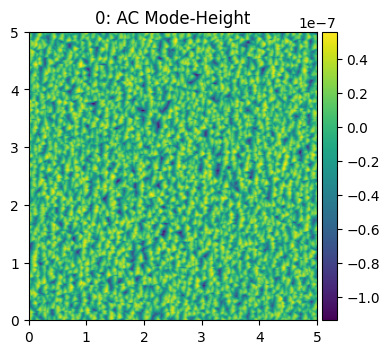

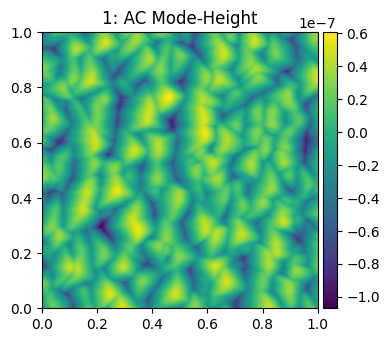

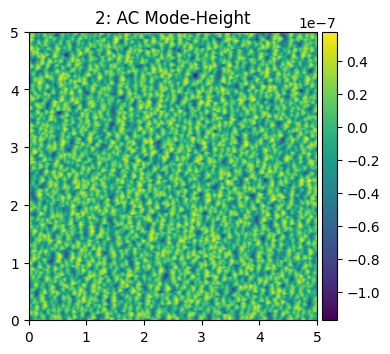

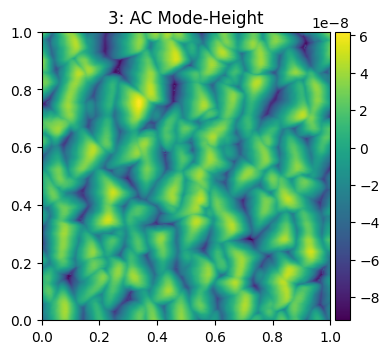

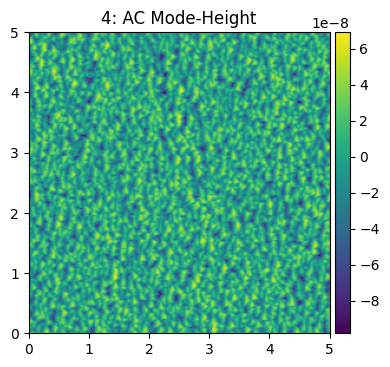

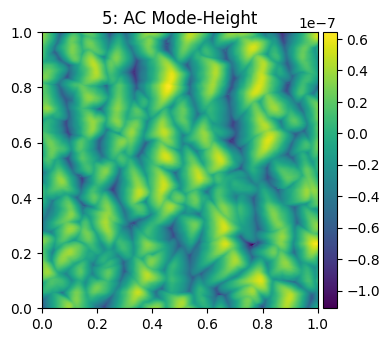

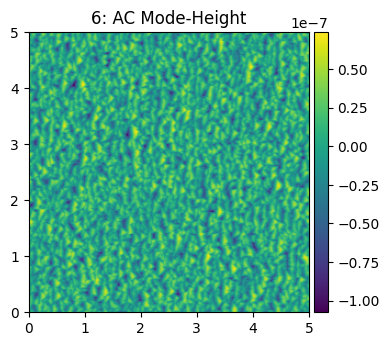

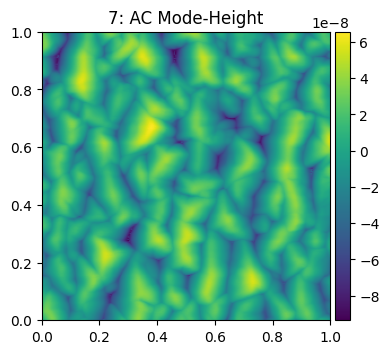

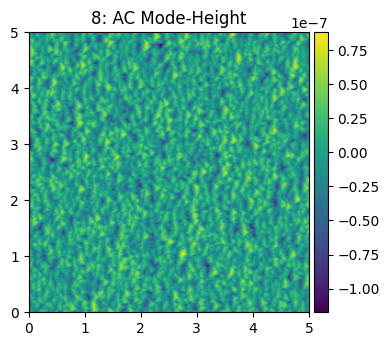

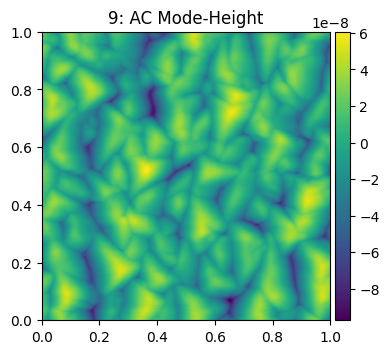

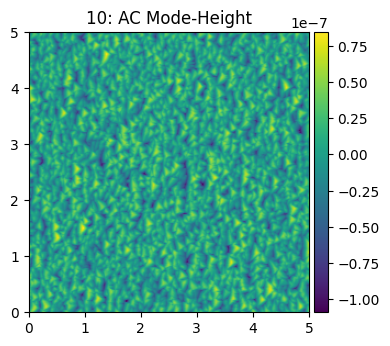

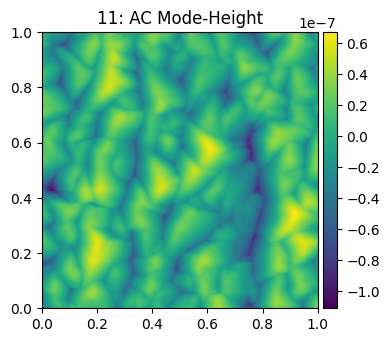

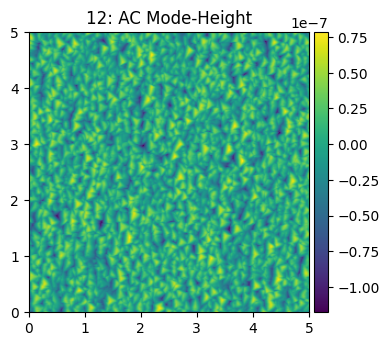

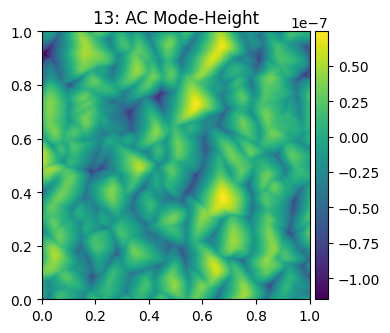

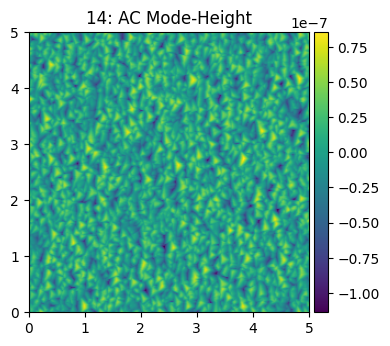

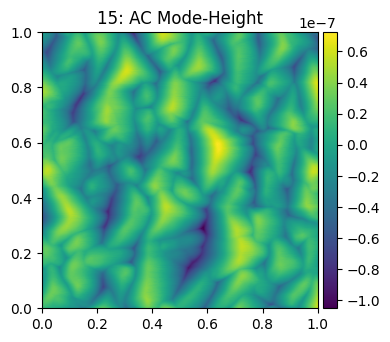

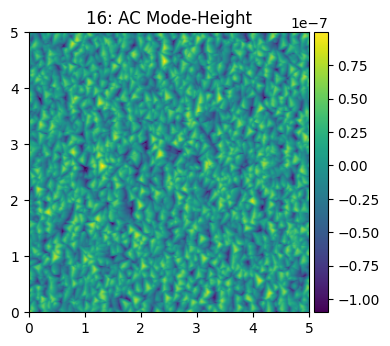

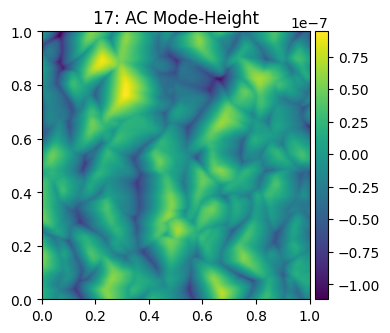

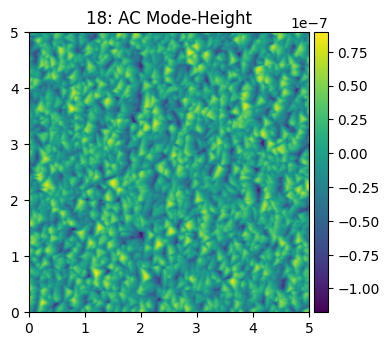

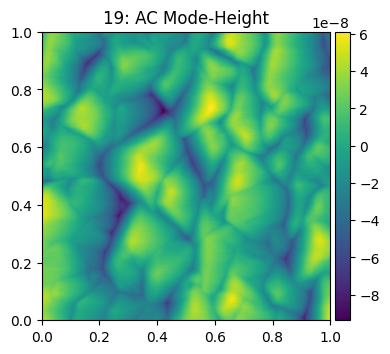

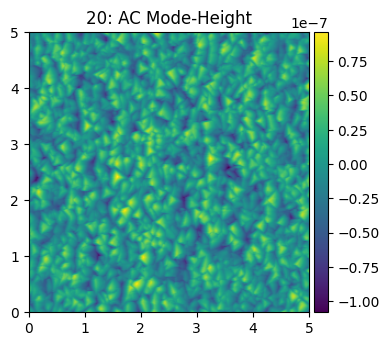

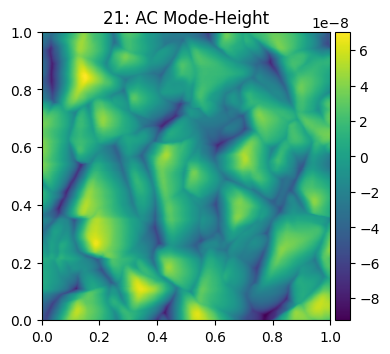

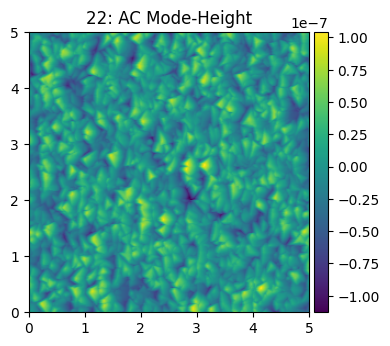

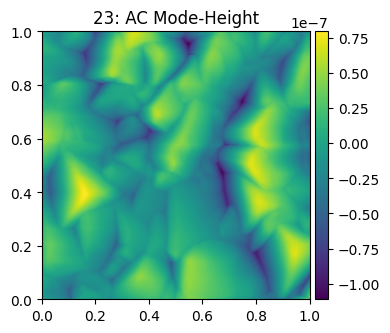

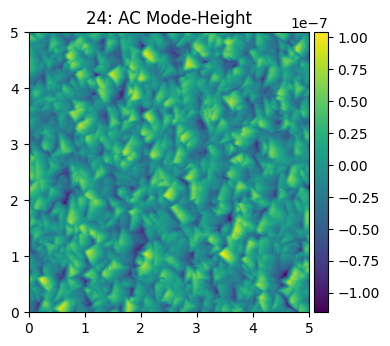

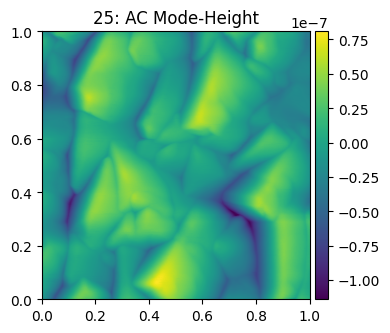

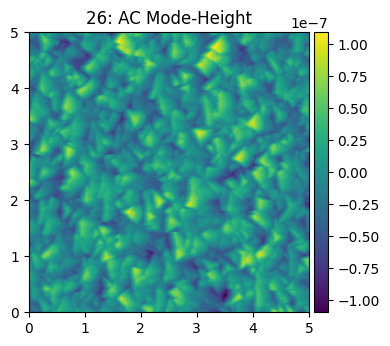

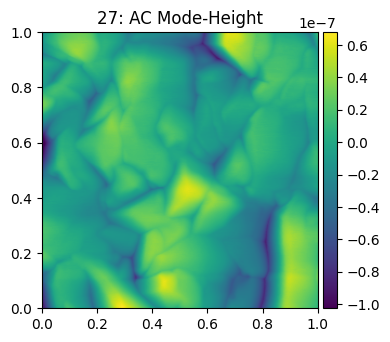

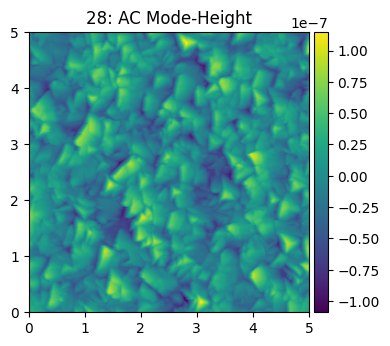

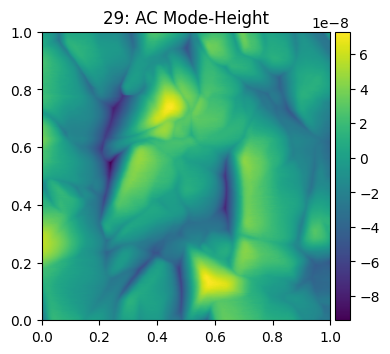

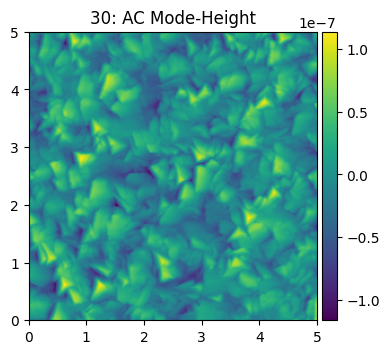

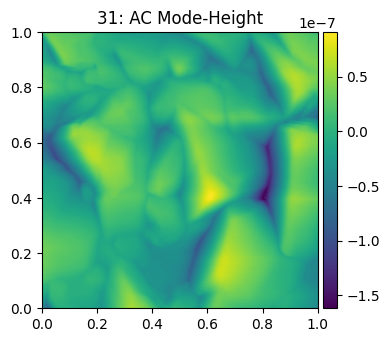

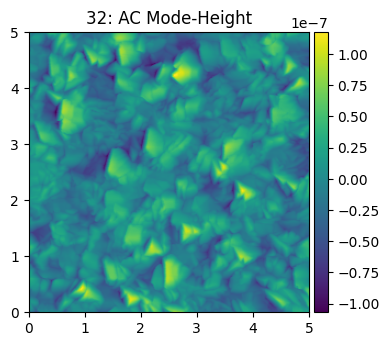

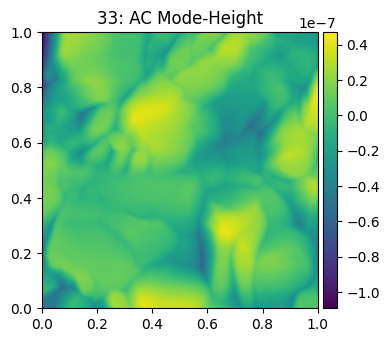

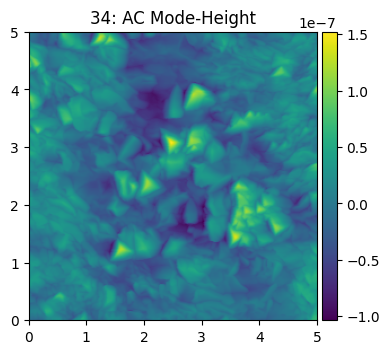

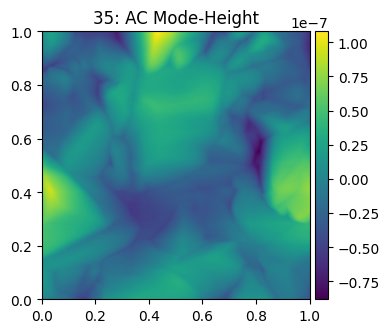

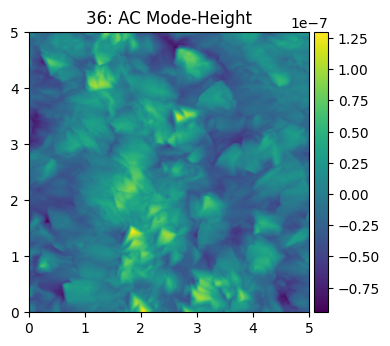

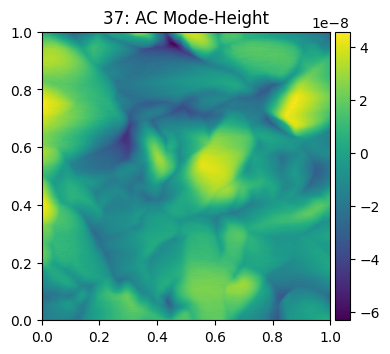

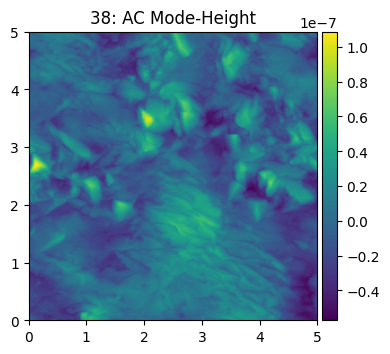

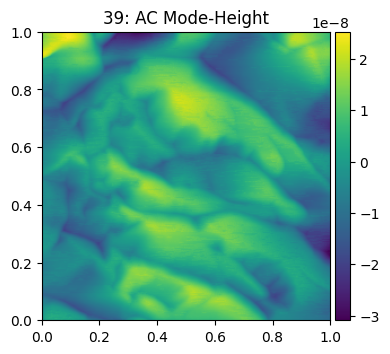

In [2]:
# see data
import matplotlib.pyplot as plt
import numpy as np
folder = 'WTV_AG/'
import aespm.tools as at
fnames, data = at.display_ibw_folder(folder=folder, key=['Height']);

In [3]:
#crop the part of image scans for analysis. You can utilize any image size, but I got a Resource exhausted error for sizes larger than 128.
image_size = (128, 128)

dataset = np.array([data[i*2+1].data[0] for i in range(len(data)//2)])

crop_dataset = dataset[:,:image_size[0], :image_size[1]]

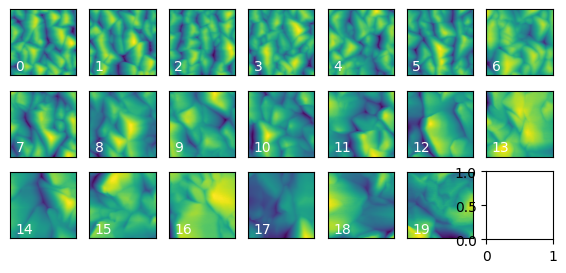

In [4]:
fig, ax = plt.subplots(3,7, figsize=(7,3))

for i, _ in enumerate(ax.flat):
    try:
      _.imshow(crop_dataset[i], origin='lower')
      _.set_xticks([])
      _.set_yticks([])
      _.text(10,10, str(i), color='white')
    except IndexError:
        pass

In [5]:
_, norm_topo = normalize(crop_dataset)

x_topo = np.arange(len(norm_topo))#position in the combi lib for linearization
mod = (norm_topo, x_topo)

## 2. Linear VAE(vaeGP starts after this section)

In [6]:
from vaeGP.vae import VAE

2024-04-26 22:25:40.461401: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 22:25:45.107020: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 22:25:51.446683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
vae_topo, _, (z_mod1, z_std1), scaler = VAE(mod, latent_dim=2, batch_size=16,
                          n_epoch=500, lvae_range = (0,1), verbose=True)

Epoch 1/500


2024-04-26 22:26:10.268839: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 - 2s - 2s/step - loss: 0.0000e+00
Epoch 2/500
1/1 - 0s - 162ms/step - loss: 0.0000e+00
Epoch 3/500
1/1 - 0s - 144ms/step - loss: 0.0000e+00
Epoch 4/500
1/1 - 0s - 149ms/step - loss: 0.0000e+00
Epoch 5/500
1/1 - 0s - 148ms/step - loss: 0.0000e+00
Epoch 6/500
1/1 - 0s - 153ms/step - loss: 0.0000e+00
Epoch 7/500
1/1 - 0s - 147ms/step - loss: 0.0000e+00
Epoch 8/500
1/1 - 0s - 144ms/step - loss: 0.0000e+00
Epoch 9/500
1/1 - 0s - 146ms/step - loss: 0.0000e+00
Epoch 10/500
1/1 - 0s - 141ms/step - loss: 0.0000e+00
Epoch 11/500
1/1 - 0s - 141ms/step - loss: 0.0000e+00
Epoch 12/500
1/1 - 0s - 143ms/step - loss: 0.0000e+00
Epoch 13/500
1/1 - 0s - 130ms/step - loss: 0.0000e+00
Epoch 14/500
1/1 - 0s - 145ms/step - loss: 0.0000e+00
Epoch 15/500
1/1 - 0s - 144ms/step - loss: 0.0000e+00
Epoch 16/500
1/1 - 0s - 146ms/step - loss: 0.0000e+00
Epoch 17/500
1/1 - 0s - 129ms/step - loss: 0.0000e+00
Epoch 18/500
1/1 - 0s - 141ms/step - loss: 0.0000e+00
Epoch 19/500
1/1 - 0s - 145ms/step - loss: 0.0000e+0

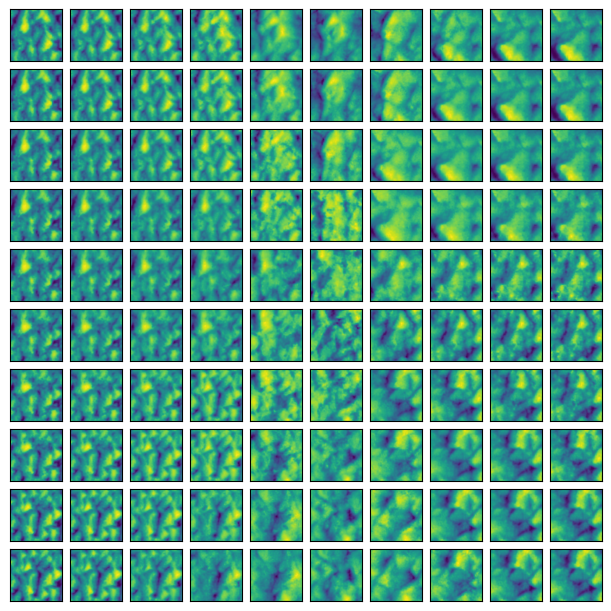

In [14]:
#2D manifold
vae_topo.plot_2Dlatent_space(n=10, figsize=6)

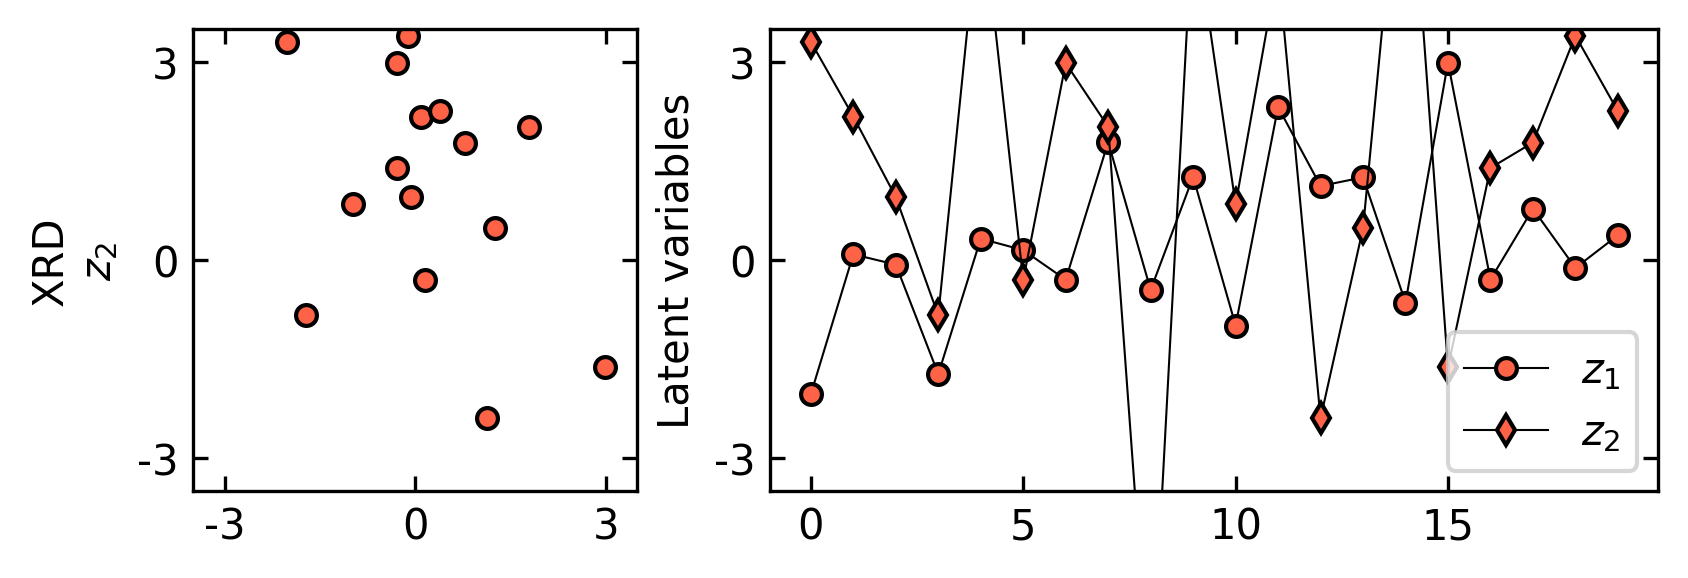

In [15]:
#latent distributions and compositional dependencies of latent variables

import matplotlib.gridspec as gridspec

z_mod = [z_mod1,]
x_mod = [mod[1],]
colors = ['tomato', 'deepskyblue']
modalities = ['XRD', 'Topography']

fig = plt.figure(figsize=(6.3, 2), dpi = 300)
fig.subplots_adjust(wspace=0.2)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,2])

axes = []

for i in range(1):
  ax = fig.add_subplot(gs[i, 0])#, aspect=1.4/7)
  ax.plot(z_mod[i][:,-2], z_mod[i][:,-1], 'o', color='black',
          markersize=5, markerfacecolor=colors[i], lw=0.5)

  ax.set_xlim(-3.5,3.5)
  ax.set_ylim(-3.5,3.5)
  ax.set_xticks([-3, 0, 3])
  ax.set_yticks([-3,0,3])
  ax.set_xticklabels([-3, 0, 3])
  ax.set_yticklabels([-3,0,3])

  ax.set_ylabel('{}\n$z_2$'.format(modalities[i],))

  axes.append(ax)

for i in range(1):
  ax = fig.add_subplot(gs[i, 1])
  ax.plot(x_mod[i], z_mod[i][:,-2], 'o-', color='black',
          markersize=5, markerfacecolor=colors[i], lw=0.5, label='$z_1$')
  ax.plot(x_mod[i], z_mod[i][:,-1], 'd-', color='black',
          markersize=5, markerfacecolor=colors[i], lw=0.5, label='$z_2$')

  ax.set_ylim(-3.5,3.5)
  ax.set_yticks([-3,0,3])
  ax.set_yticklabels([-3,0,3])

  ax.set_ylabel('Latent variables')
  ax.legend(loc = 'lower right')


  axes.append(ax)

for _ in axes:
  _.tick_params('both', right='true', top='true', direction='in')


#fig.savefig('vae_full_gt.jpg', bbox_inches='tight', dpi=300)

## 3. vaeGP analysis

In [16]:
## second
_, norm_topo = normalize(crop_dataset)

x_topo = np.arange(len(norm_topo))#position in the combi lib for linearization
mod = (norm_topo, x_topo)

In [17]:
#Priors:  None for default choice or select smth specific
import numpyro.distributions as dist

#number of initial measurements (no less than 3)
N_seeds = 3
N_seeds = max(N_seeds, 3)

#VAE
latent_dim = 2
n_epoch = 200

#GP inputs
latent_for_gp = -1 #select vae latent to train gp

#lengthscale_prior_dist
ls = dist.Uniform(0, 30)
#noise prior
noise_prior = dist.HalfNormal(0.3)

mean_fn       = None
mean_fn_prior = None

acquisition_function = 'UCB' #or 'UCB', or 'MU', or 'EI'
maximize = True #maximize or minimize acq. func.


#number of exploration steps
N_iteration = 5

# #dataset. I have no ideas why I called it scalarizer.
# scalarizer = None

In [18]:
from vaeGP.gp import Orchestrated_BO
from vaeGP.plottling import plot_ld

In [19]:
## seeding

#-------------------------------------------------------
fig_vae = []
fig_acq = []
fig_gp = []

res_stats = {}
#-------------------------------------------------------


X_test =mod[1]#[np.newaxis,:]


#Seed locations
ind_f = np.random.choice(np.arange(1,len(X_test)-1), size=N_seeds-2, replace=False)
ind_f = np.append(ind_f, [0, mod[1].shape[0]-1]).astype(int)


#X_train
X_train = mod[1][ind_f]


-- VAE (seed locations) --
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


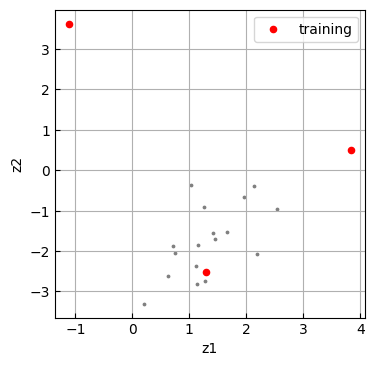

In [20]:
#VAE train
VAE_train= [mod[0][ind_f], mod[1][ind_f]] #location of measurements


print(f'\n-- VAE (seed locations) --')

_, _, (z_mean, z_std), scaler = VAE(VAE_train, latent_dim=latent_dim, n_epoch=n_epoch,
                            test=mod[0], batch_size=min(4, len(VAE_train[0])), lvae_range = (0,1))

#z_mean_train is available in the real experiment
z_mean_train = z_mean[ind_f]

fig = plot_ld(train = z_mean_train, test = z_mean, return_fig=True, highlight_latest=False)
fig.suptitle('Iteration 0')
fig_vae.append(fig)

#y train for GP
GP_train = z_mean_train[:, latent_for_gp]



In [21]:
#@title priors for structured GP
from typing import Dict

import numpyro
import jax.numpy as jnp

def piecewise(x: jnp.ndarray, params: Dict[str, float]) -> jnp.ndarray:
    """Power-law behavior before and after the transition"""
    return jnp.piecewise(
        x, [x < params["t"], x >= params["t"]],
        [lambda x: x**params["beta1"], lambda x: x**params["beta2"]])


def piecewise_priors():
    # Sample model parameters
    t = numpyro.sample("t", numpyro.distributions.Uniform(40, 80))
    beta1 = numpyro.sample("beta1", numpyro.distributions.LogNormal(0, 1))
    beta2 = numpyro.sample("beta2", numpyro.distributions.LogNormal(0, 1))
    # Return sampled parameters as a dictionary
    return {"t": t, "beta1": beta1, "beta2": beta2}


mean_fn       = piecewise
mean_fn_prior = piecewise_priors


------ Iteration 1 --------


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
sample: 100%|███| 4000/4000 [00:12<00:00, 320.95it/s, 1023 steps of size 4.74e-04. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta1      0.25      0.11      0.23      0.10      0.41     40.77      1.07
      beta2      1.50      2.00      0.82      0.06      3.48     41.69      1.00
k_length[0]      3.21      3.86      1.58      0.04      9.00     32.68      1.03
    k_scale      5.81      3.48      5.14      0.85     10.61     34.04      1.13
      noise      0.43      0.22      0.42      0.03      0.73     37.45      1.05
          t     59.80     10.87     60.14     42.49     75.61     55.57      1.00



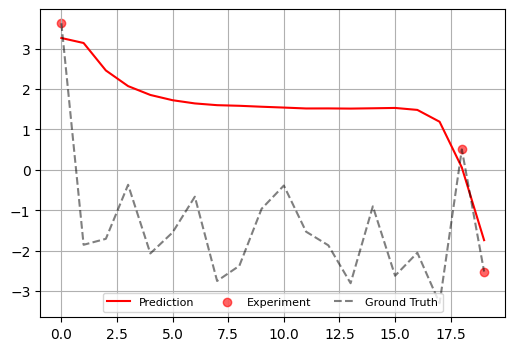

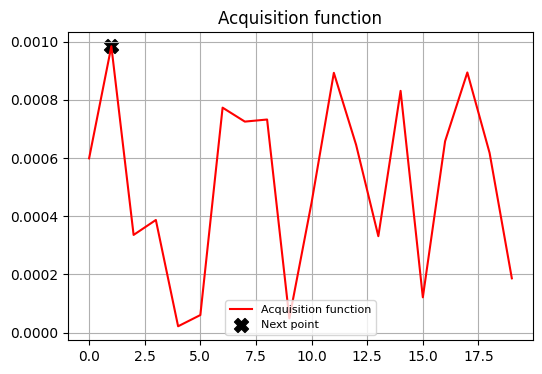


------ Iteration 2 --------

-- VAE iteration 2) --

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


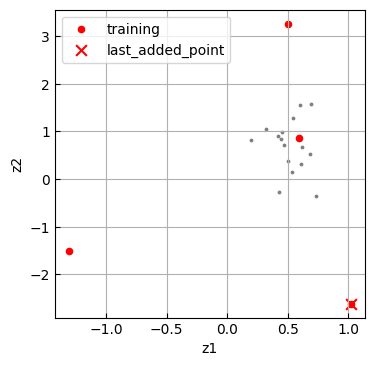

sample: 100%|███| 4000/4000 [00:15<00:00, 254.40it/s, 1023 steps of size 1.03e-03. acc. prob=0.85]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta1      0.37      0.13      0.37      0.19      0.61    100.62      1.00
      beta2      1.53      1.90      0.88      0.05      3.64    151.26      1.00
k_length[0]      8.36      8.89      3.96      0.01     23.29     93.22      1.00
    k_scale      3.09      2.37      2.49      0.12      5.93    161.22      1.01
      noise      0.51      0.23      0.51      0.06      0.86     86.79      1.00
          t     60.61     11.23     60.70     44.88     79.29    172.73      1.00



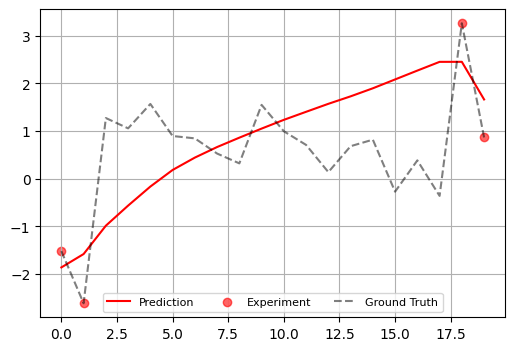

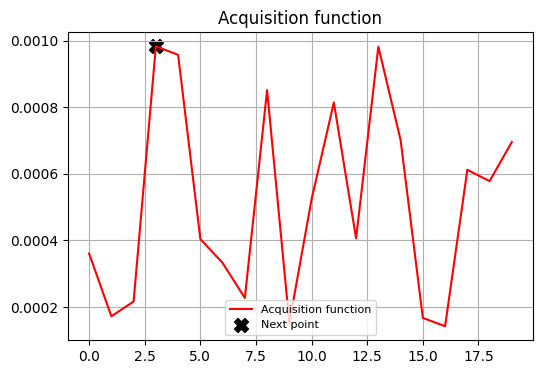


------ Iteration 3 --------

-- VAE iteration 3) --

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


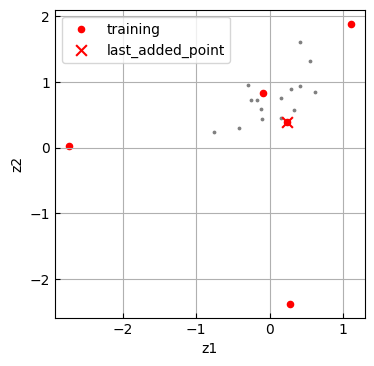

sample: 100%|███| 4000/4000 [00:17<00:00, 223.74it/s, 1023 steps of size 4.34e-04. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta1      0.30      0.09      0.31      0.14      0.43     69.74      1.00
      beta2      1.51      1.75      0.82      0.06      3.68     31.13      1.00
k_length[0]     15.26      7.95     15.82      2.99     27.15     63.72      1.01
    k_scale      1.41      1.11      1.13      0.14      2.75     57.50      1.04
      noise      0.48      0.17      0.47      0.21      0.73     42.55      1.00
          t     61.32     11.15     62.47     44.45     77.26     44.52      1.00



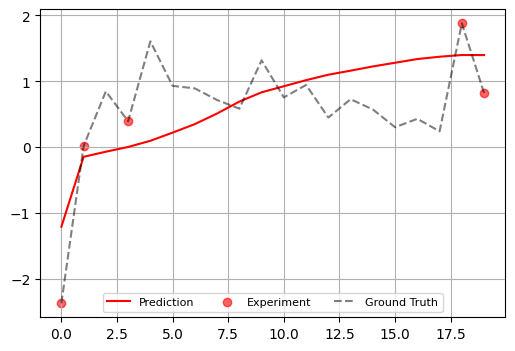

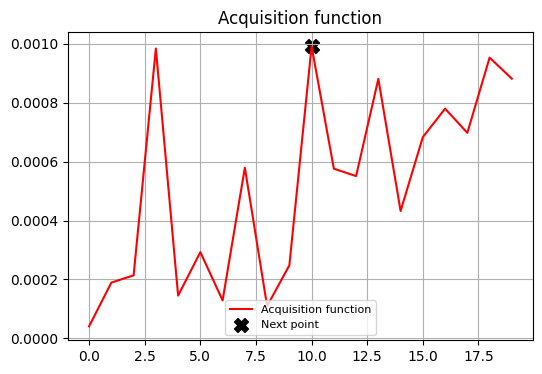


------ Iteration 4 --------

-- VAE iteration 4) --

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


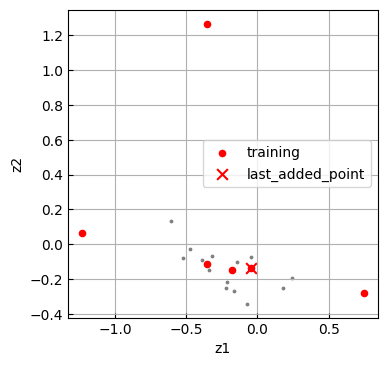

sample: 100%|███| 4000/4000 [00:18<00:00, 211.28it/s, 1023 steps of size 9.36e-04. acc. prob=0.89]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta1      0.19      0.08      0.18      0.06      0.31     72.61      1.02
      beta2      1.54      1.94      0.88      0.04      3.58    200.98      1.00
k_length[0]     15.52      7.26     15.62      3.45     26.69    234.01      1.00
    k_scale      1.43      1.14      1.11      0.09      2.86    124.03      1.03
      noise      0.29      0.15      0.26      0.07      0.51    163.69      1.00
          t     60.38     11.06     60.58     43.86     78.30    144.63      1.00



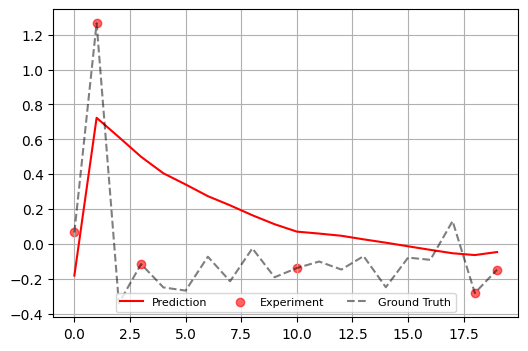

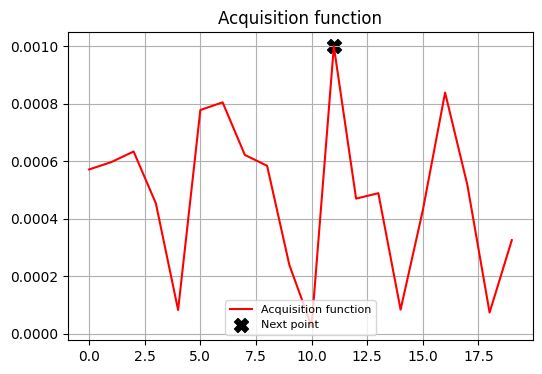


------ Iteration 5 --------

-- VAE iteration 5) --

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


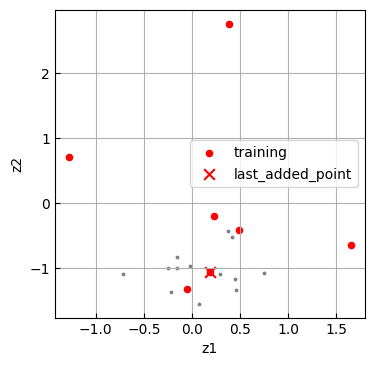

sample: 100%|███| 4000/4000 [00:21<00:00, 184.79it/s, 1023 steps of size 8.48e-04. acc. prob=0.90]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta1      0.21      0.09      0.20      0.08      0.36     73.54      1.04
      beta2      1.57      2.00      0.88      0.04      3.88    120.52      1.00
k_length[0]      6.49      6.08      4.15      0.06     15.42    114.65      1.01
    k_scale      2.97      2.06      2.46      0.34      5.39    122.66      1.04
      noise      0.52      0.21      0.52      0.17      0.88    104.63      1.00
          t     60.04     10.85     60.06     42.08     76.23    118.51      1.00



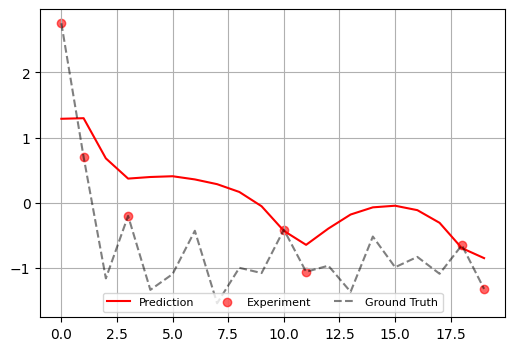

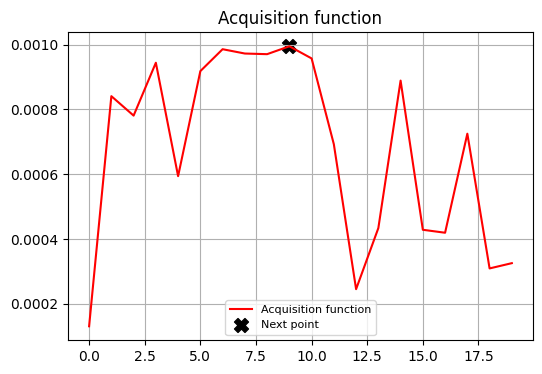

In [22]:
#iterations
for iter in range(N_iteration):

  print(f'\n------ Iteration {iter+1} --------')

  #save current state
  res_stats[f'iter {iter}'] = {'VAE':      np.array(z_mean_train).astype(float),
                               'VAE_full': np.array(z_mean).astype(float),}


#VAE
  if iter > 0:
    print(f'\n-- VAE iteration {iter+1}) --\n')
    ind_f = np.append(ind_f, maxacq_idx)
    X_train = np.append(X_train, X_test[maxacq_idx])

    VAE_train[0] = np.append(VAE_train[0], [mod[0][ind_f[-1]]], axis=0)# patch
    VAE_train[1] = np.append(VAE_train[1], next_idx)# compostition

    _, _, (z_mean, z_std), scaler = VAE(VAE_train, latent_dim=latent_dim, n_epoch=n_epoch,
                            test=mod[0], batch_size=min(4, len(VAE_train[0])), lvae_range = (0,1))

    z_mean_train = z_mean[ind_f]

    fig = plot_ld(train = z_mean_train, test = z_mean, return_fig=True)
    fig.suptitle('Iteration {}'.format(iter))
    fig_vae.append(fig)

    #GP_train = np.append(GP_train, 0)
    GP_train = z_mean_train[:,latent_for_gp].squeeze()

#GP BO
  gp_model = Orchestrated_BO(kernel='RBF',
                             lengthscale_prior_dist = ls,
                              noise_prior_dist = noise_prior,
                             mean_fn = mean_fn,
                             mean_fn_prior = mean_fn_prior)

  gp_model.iteration(X_train, np.array(GP_train), X_test)

  fig = gp_model.visualize_res(vae_latents=z_mean[:,latent_for_gp])
  fig_gp.append(fig)

  maxacq_idx, maxacq_val,fig = gp_model.acquisition(gp_model, acq_func=acquisition_function,
                                                    maximize=True,
                                                    visualize=True)
  fig_acq.append(fig)

  next_idx = X_test[maxacq_idx]

  res_stats[f'iter {iter}'].update(gp_model.get_statistics())